In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_data = pd.read_excel('base_model_2.2AP-BS num-glia-with-inflam-spreadsheet.xlsx')
num_data.head(20)

,BehaviorSpace results (NetLogo 6.4.0),Spreadsheet version 2.0,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 391,Unnamed: 392,Unnamed: 393,Unnamed: 394,Unnamed: 395,Unnamed: 396,Unnamed: 397,Unnamed: 398,Unnamed: 399,Unnamed: 400
0,base_model_2.2AP-BS.nlogo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,num-glia-with-inflam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/19/2024 16:00:27:933 -0800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,min-pxcor,max-pxcor,min-pycor,max-pycor,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-16,16,-16,16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,[run number],1,1,2,2,3,3,4,4,5,...,196,196,197,197,198,198,199,199,200,200
6,initial-number-microglia,1,NaN,1,NaN,1,NaN,1,NaN,1,...,20,NaN,20,NaN,20,NaN,20,NaN,20,NaN
7,initial-number-d-neuron,15,NaN,15,NaN,15,NaN,15,NaN,15,...,15,NaN,15,NaN,15,NaN,15,NaN,15,NaN
8,initial-number-h-neuron,10,NaN,10,NaN,10,NaN,10,NaN,10,...,10,NaN,10,NaN,10,NaN,10,NaN,10,NaN
9,inflam-radius,3,NaN,3,NaN,3,NaN,3,NaN,3,...,3,NaN,3,NaN,3,NaN,3,NaN,3,NaN


In [3]:
# only want data rows
num_data.filter([6, 14], axis=0)

,BehaviorSpace results (NetLogo 6.4.0),Spreadsheet version 2.0,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 391,Unnamed: 392,Unnamed: 393,Unnamed: 394,Unnamed: 395,Unnamed: 396,Unnamed: 397,Unnamed: 398,Unnamed: 399,Unnamed: 400
6,initial-number-microglia,1,NaN,1,NaN,1,NaN,1,NaN,1,...,20,NaN,20,NaN,20,NaN,20,NaN,20,NaN
14,NaN,1271,1271,2460,2460,959,959,791,791,1774,...,52,52,46,46,56,56,104,104,48,48


In [4]:
# transposing sub-frame created in previous cell, resetting index
num_data.filter([6, 14], axis=0).T.reset_index()

,index,6,14
0,BehaviorSpace results (NetLogo 6.4.0),initial-number-microglia,NaN
1,Spreadsheet version 2.0,1,1271
2,Unnamed: 2,NaN,1271
3,Unnamed: 3,1,2460
4,Unnamed: 4,NaN,2460
...,...,...,...
396,Unnamed: 396,NaN,56
397,Unnamed: 397,20,104
398,Unnamed: 398,NaN,104
399,Unnamed: 399,20,48


In [5]:
# removing old index col, renaming data cols.
num_data_clean = (
    num_data
    .filter([6, 14], axis=0)
    .T
    .reset_index()
    .filter([6, 14])
)
num_data_clean.columns = num_data_clean.iloc[0]
num_data_clean = num_data_clean.iloc[1:]
num_data_clean.head()

,initial-number-microglia,NaN
1,1,1271
2,NaN,1271
3,1,2460
4,NaN,2460
5,1,959


In [6]:
# removing extra rows caused by Netlogo formatting
num_data_clean = num_data_clean[num_data_clean['initial-number-microglia'].notnull()]
num_data_clean.rename(columns={np.nan: 'ticks'}, inplace=True)
num_data_clean.head()

,initial-number-microglia,ticks
1,1,1271
3,1,2460
5,1,959
7,1,791
9,1,1774


In [7]:
# making sure we have the same number of runs per number of microglia
print(num_data_clean.groupby(['initial-number-microglia']).size().to_string())

initial-number-microglia
1     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
9     10
10    10
11    10
12    10
13    10
14    10
15    10
16    10
17    10
18    10
19    10
20    10


In [8]:
# setting plot style
plt.style.use('bmh')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


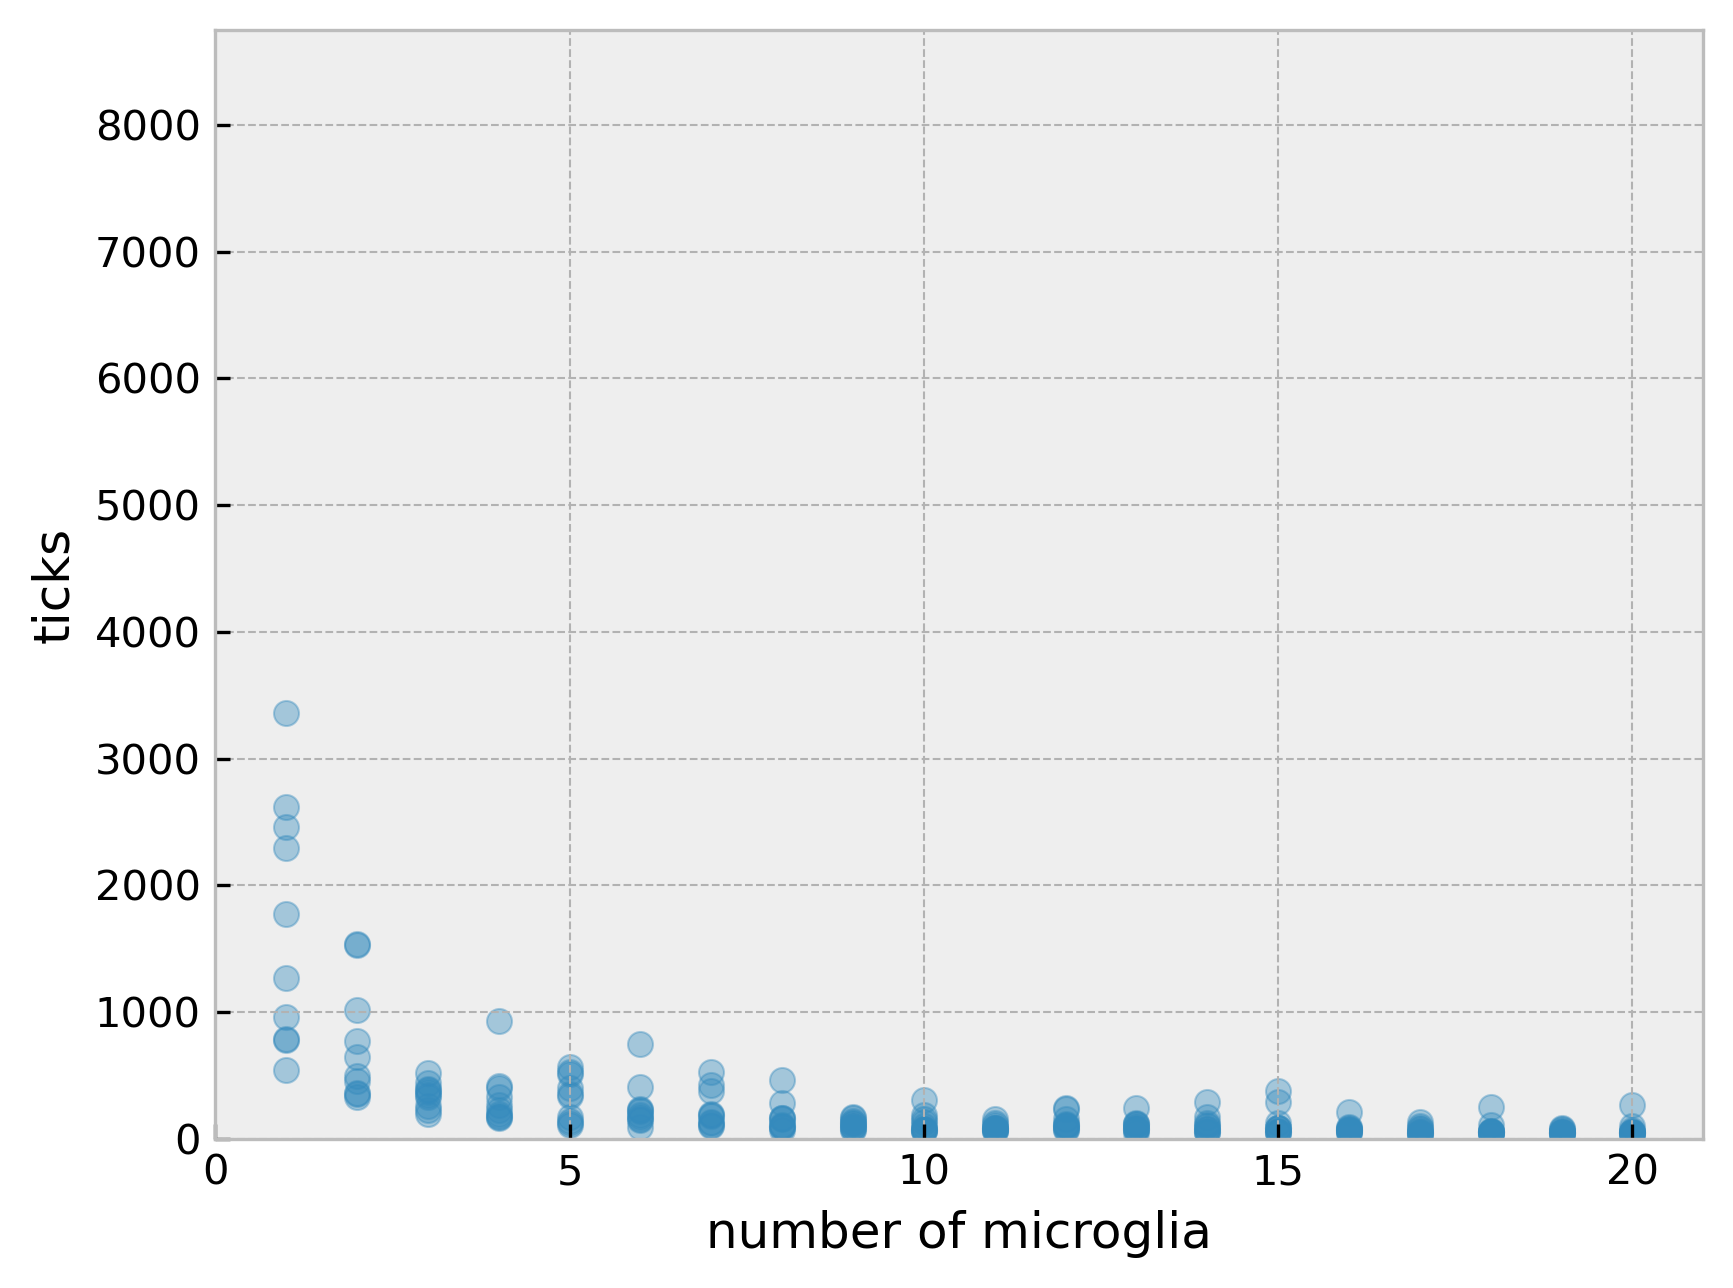

In [9]:
plt.scatter(num_data_clean['initial-number-microglia'],
            num_data_clean['ticks'],
            alpha=0.4)

# plt.scatter(num_data_clean['initial-number-microglia'],
#             num_data_clean['ticks'])

plt.ylabel('ticks')
# plt.ylabel('hours')
plt.xlabel('number of microglia')
plt.ylim(0, 8750)
plt.xlim(0, 21)
plt.xticks(np.arange(0, 21, 5))
plt.legend().set_visible(False)

# plt.savefig('num-glia-inflam-old-scale-alpha-hrs.png', bbox_inches='tight')
plt.savefig('num-glia-inflam-old-scale-alpha.png', bbox_inches='tight')
# plt.savefig('num-glia-inflam-old-scale.png', bbox_inches='tight')

In [10]:
# get min/max of y
print(num_data_clean['ticks'].min(), num_data_clean['ticks'].max())

29 3363


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


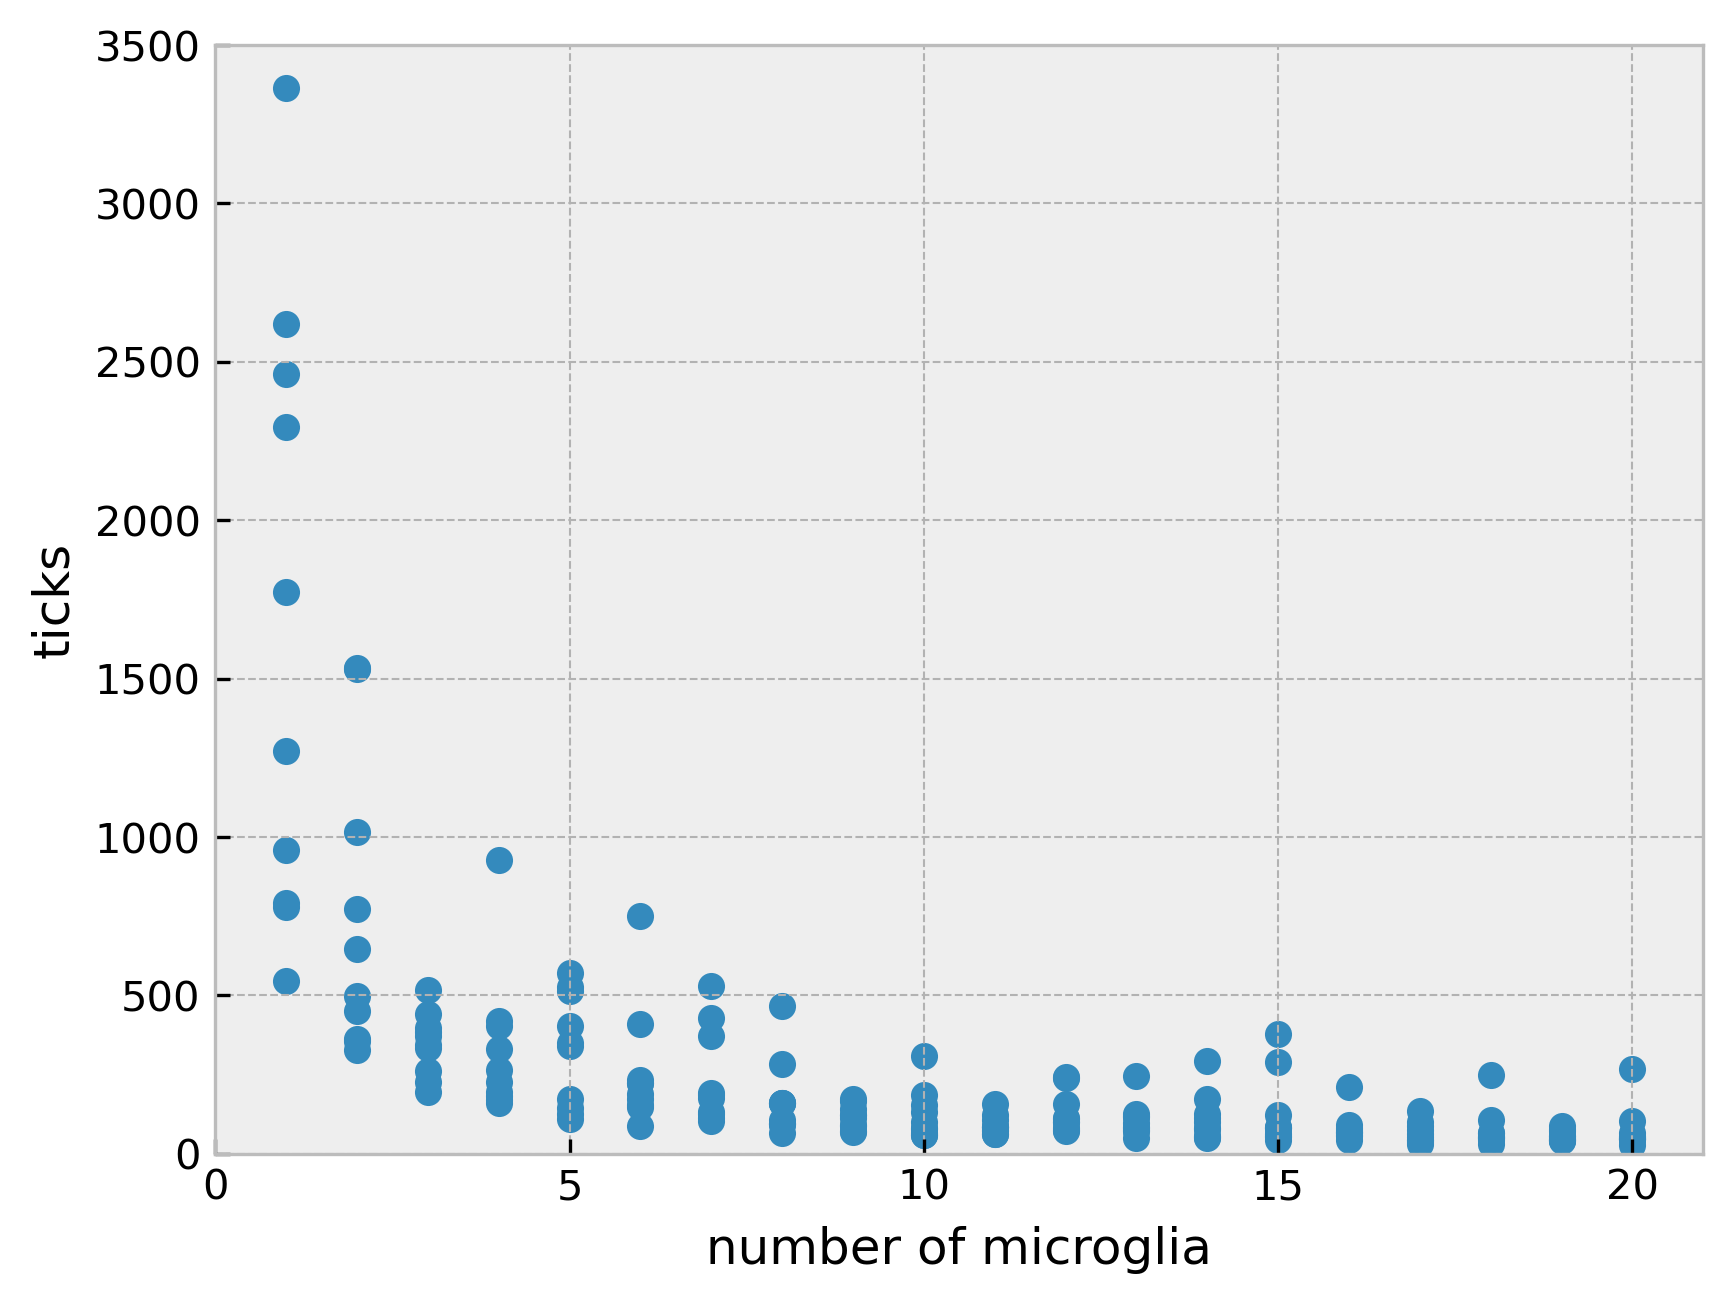

In [11]:
# Alternative plots where the scale is more in line with the
# recorded number of ticks per run.

# Uncomment to get plot where the alpha value is 0.4
# plt.scatter(num_data_clean['initial-number-microglia'],
#             num_data_clean['ticks'],
#             alpha=0.4)

plt.scatter(num_data_clean['initial-number-microglia'],
            num_data_clean['ticks'])

plt.ylabel('ticks')
plt.xlabel('number of microglia')
plt.ylim(0, 3500)
plt.xlim(0, 21)
plt.xticks(np.arange(0, 21, 5))
plt.legend().set_visible(False)

# plt.savefig('num-glia-inflam-new-scale-alpha.png', bbox_inches='tight')
# plt.savefig('num-glia-inflam-new-scale.png', bbox_inches='tight')